Actividad 6: Aprendizaje supervisado, árbol de decisión

Inteligencia artificial y redes neuronales

hora: N4

Nombre de los integrantes

Erik Santiago Garcia Chavez 2132013 IMTC

Alan Ramirez Bravo 2132003 IMTC

In [1]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [2]:
# Cargar el conjunto de datos
data = load_breast_cancer()
X = data.data  # Características
y = data.target  # Etiquetas (0: maligno, 1: benigno)
feature_names = data.feature_names
target_names = data.target_names

# Mostrar información básica del dataset
print("Número de muestras:", X.shape[0])
print("Número de características:", X.shape[1])
print("Clases:", target_names)

Número de muestras: 569
Número de características: 30
Clases: ['malignant' 'benign']


In [3]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento: (455, 30) (455,)
Dimensiones del conjunto de prueba: (114, 30) (114,)


In [4]:
# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Mostrar la importancia de las características
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Importancia de las características:")
for i in range(X.shape[1]):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

Importancia de las características:
1. mean concave points: 0.6914
2. worst concave points: 0.0657
3. mean texture: 0.0585
4. worst radius: 0.0523
5. worst perimeter: 0.0515
6. fractal dimension error: 0.0186
7. worst texture: 0.0174
8. concave points error: 0.0159
9. area error: 0.0120
10. worst smoothness: 0.0092
11. concavity error: 0.0063
12. smoothness error: 0.0012
13. worst fractal dimension: 0.0000
14. worst symmetry: 0.0000
15. symmetry error: 0.0000
16. worst area: 0.0000
17. worst concavity: 0.0000
18. worst compactness: 0.0000
19. texture error: 0.0000
20. radius error: 0.0000
21. compactness error: 0.0000
22. perimeter error: 0.0000
23. mean symmetry: 0.0000
24. mean fractal dimension: 0.0000
25. mean compactness: 0.0000
26. mean concavity: 0.0000
27. mean smoothness: 0.0000
28. mean area: 0.0000
29. mean perimeter: 0.0000
30. mean radius: 0.0000



Primeras 3 predicciones:
Muestra 1: Real = benign, Predicción = benign
Muestra 2: Real = malignant, Predicción = malignant
Muestra 3: Real = malignant, Predicción = malignant


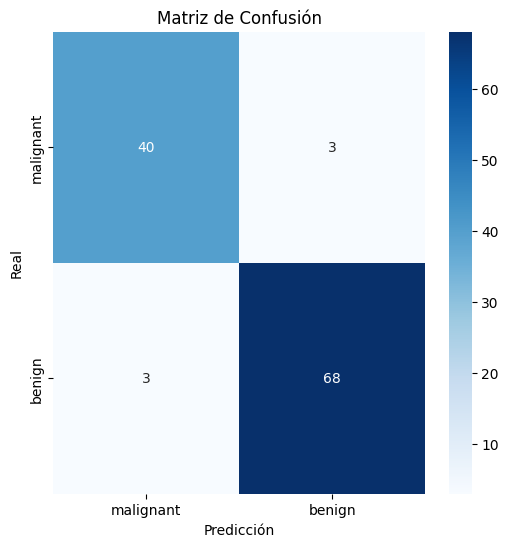


Precisión del modelo: 0.9473684210526315

Reporte de clasificación:
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [5]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Realizar 3 predicciones específicas (mostramos las primeras 3)
print("\nPrimeras 3 predicciones:")
for i in range(3):
    print(f"Muestra {i+1}: Real = {target_names[y_test[i]]}, Predicción = {target_names[y_pred[i]]}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print("\nPrecisión del modelo:", accuracy)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names))

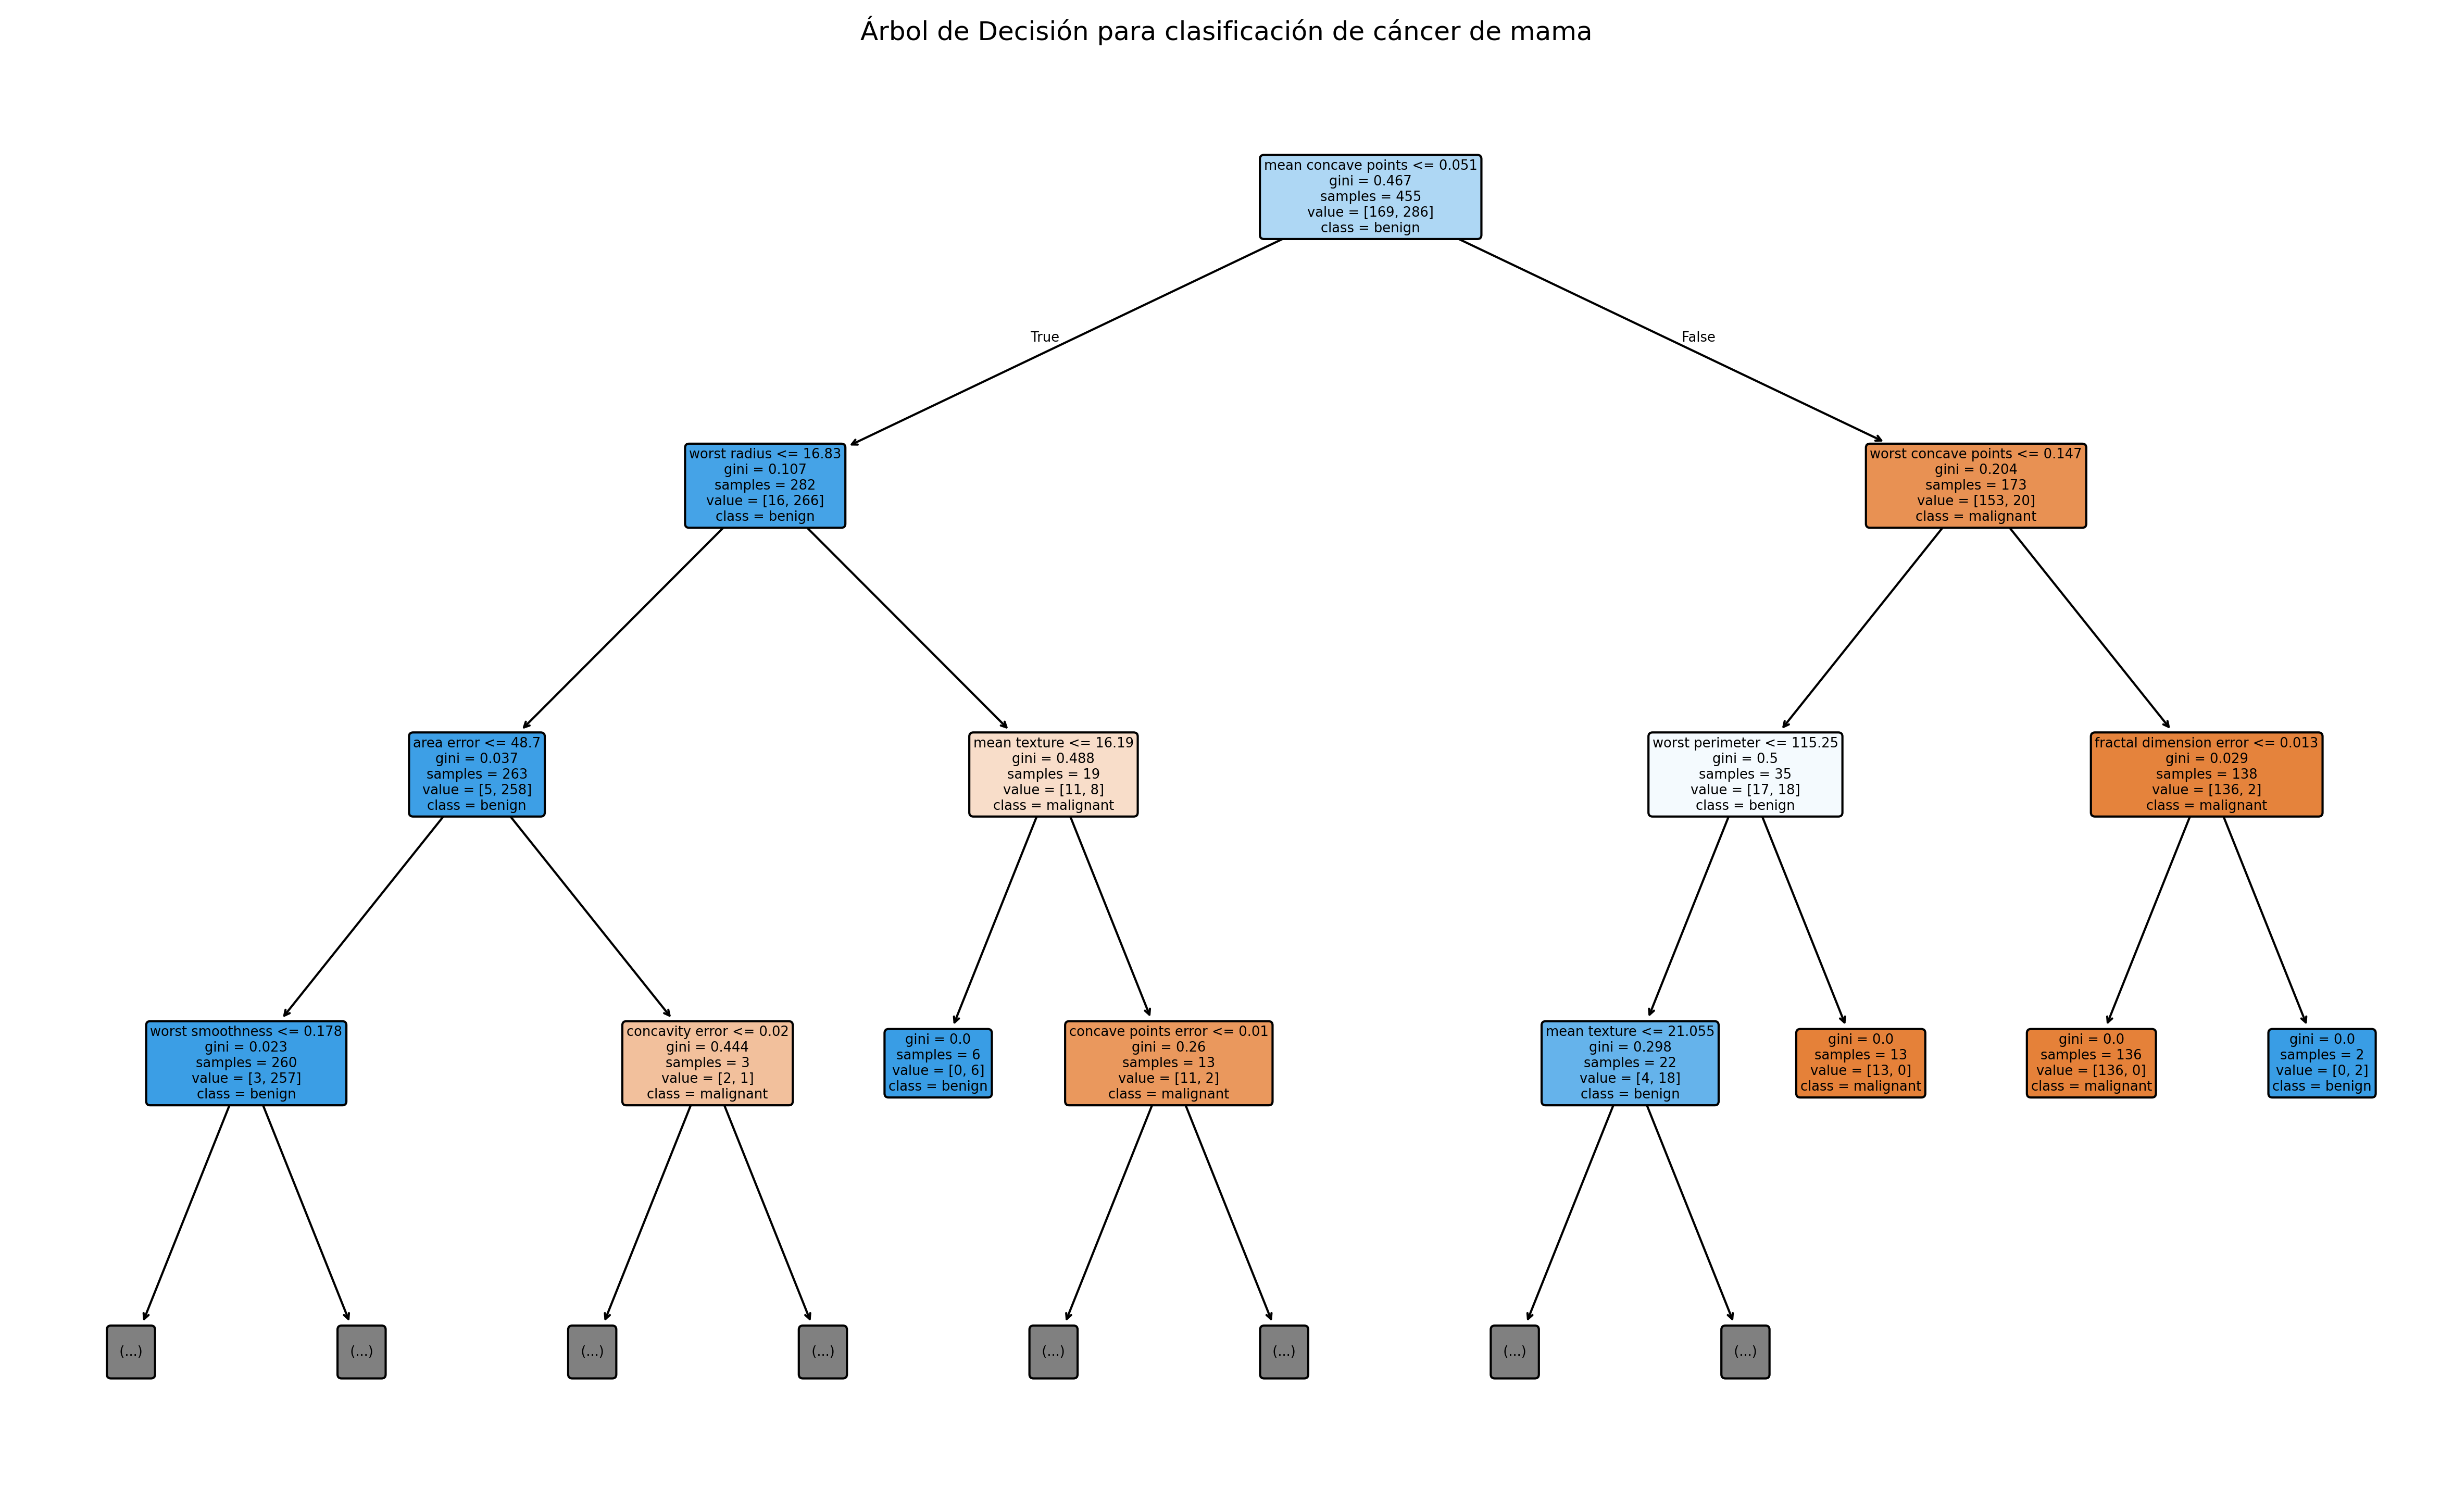

In [6]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20, 12), dpi=300)
plot_tree(model,
          feature_names=feature_names,
          class_names=target_names,
          filled=True,
          rounded=True,
          max_depth=3)  # Limitamos la profundidad para mejor visualización
plt.title("Árbol de Decisión para clasificación de cáncer de mama")
plt.show()

In [7]:
# Espacio para conclusiones y análisis de resultados
print("\nConclusiones:")
print("1. El modelo de árbol de decisión alcanzó una precisión de", round(accuracy, 2))
print("2. Las características más importantes fueron:", feature_names[indices[0]], "y", feature_names[indices[1]])
print("3. El árbol de decisión muestra cómo se toman las decisiones basadas en los umbrales de las características.")


Conclusiones:
1. El modelo de árbol de decisión alcanzó una precisión de 0.95
2. Las características más importantes fueron: mean concave points y worst concave points
3. El árbol de decisión muestra cómo se toman las decisiones basadas en los umbrales de las características.
